In [179]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig, figure
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2

In [182]:
# read data
divorce_data=pd.read_csv('divorce/divorce.csv',delimiter=";")
data=divorce_data.copy()
married_data=data[data['Class']==0].drop(columns=['Class'])
divorced_data=data[data['Class']==1].drop(columns=['Class'])
# get rank of matrix
X=data.drop(columns=['Class'])
y=data['Class']
print("Rank=",np.linalg.matrix_rank(data))

Rank= 55


In [48]:
# PCA
U,S,VT=np.linalg.svd(data)
# columns of U represent prinicaipal components of data

PCA components can be used in prediction problems. Note that PCA don't have any real world meaning and hence can't be use for explanation

### Explore data

In [70]:
# check for nans
data.isnull().values.any()

False

In [66]:
# ensure data doesn't have outliers on max value
print("Max value of an attribute in data=",max(data.max()))
# ensure data doesn't have outlier on min value
print("Max value of an attribute in data=",min(data.min()))

Max value of an attribute in data= 4
Max value of an attribute in data= 0


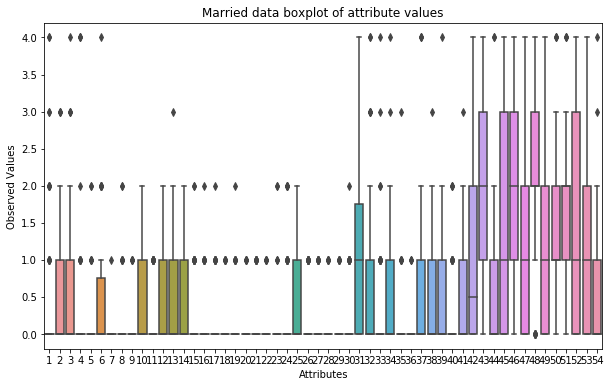

In [67]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=married_data).set(title='Married data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,70)])
fig.savefig('married-attributes', bbox_inches='tight')

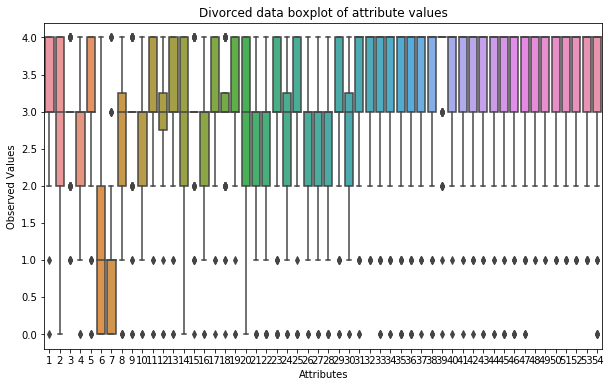

In [68]:
fig = figure(figsize=(10, 6))  # Create the figure space
sns.boxplot(data=divorced_data).set(title='Divorced data boxplot of attribute values', ylabel='Observed Values', xlabel='Attributes',
                                 xticklabels=[i for i in range(1,70)])
fig.savefig('divorced-attributes', bbox_inches='tight')

### Correlation
Darker values towards red denote high correlation.

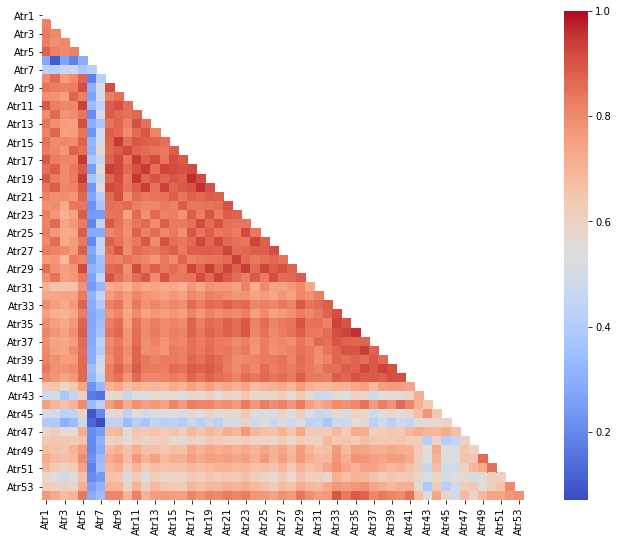

In [185]:
corr=X.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
matrix = np.triu(corr)
sns.heatmap(corr,  cmap= 'coolwarm',mask=matrix)
f.savefig('correlation.png', bbox_inches='tight')

### Chi-square scores
High scores are preferred as it means label is more dependent on the corresponding feature

Text(0.5, 1.0, 'Chi-square scores')

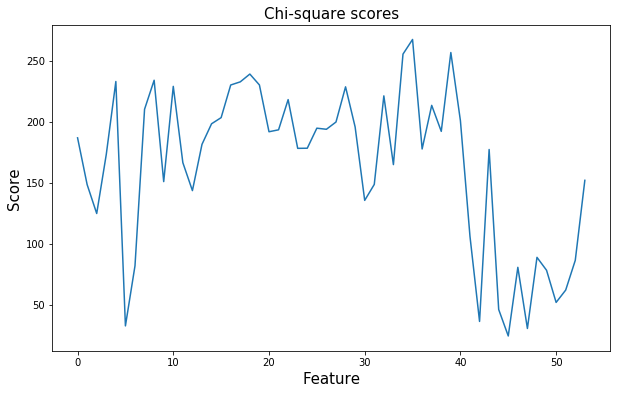

In [209]:
scores = SelectKBest(chi2, k=54).fit(X,y).scores_
fig = figure(figsize=(10, 6))  # Create the figure space
plt.plot(scores)
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.title("Chi-square scores", fontsize=15)